In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

In [51]:
import csv

data = pd.read_csv('news.csv')

data.shape

(6335, 4)

In [52]:
# delete the column 'Locations'
del data['Unnamed: 0']
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [53]:
# Check how the labels are distributed
print(np.unique(data['label']))
print(np.unique(data['label'].value_counts()))

['FAKE' 'REAL']
[3164 3171]


In [54]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [55]:
data['removed_punc'] = data['text'].apply(lambda x: remove_punct(x))
data.head()

,title,text,label,removed_punc
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [56]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [57]:
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,title,text,label,removed_punc,tokens
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr..."


In [58]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [59]:
data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,title,text,label,removed_punc,tokens,filtered_tokens
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton..."


In [60]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined 
    list could be created and used to limit the matches in input text. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [61]:
nltk.download('stopwords')
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [62]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [63]:
nltk.download('wordnet')
nltk.download('omw-1.4')
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [64]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [65]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


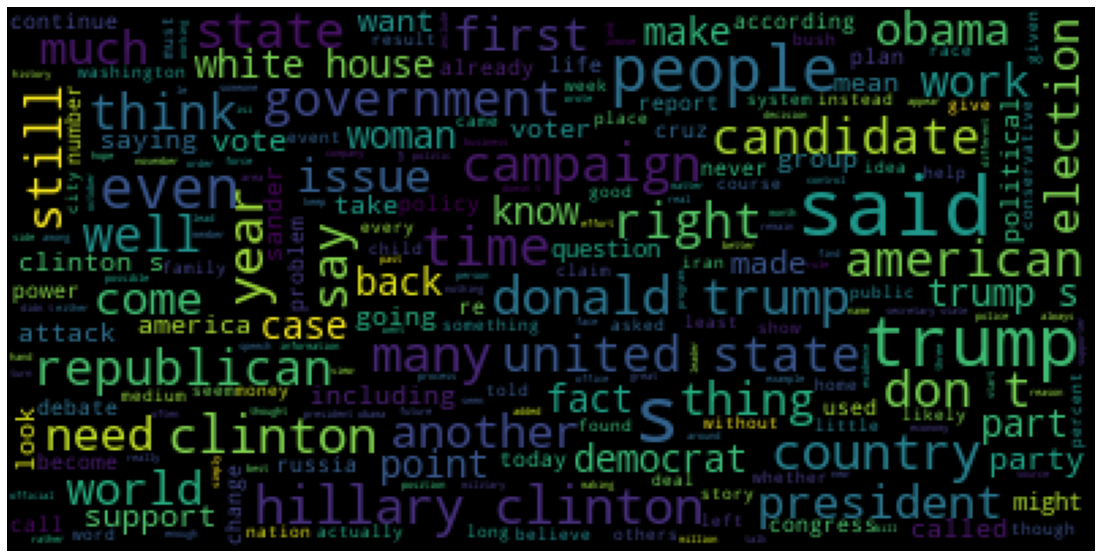

In [66]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
# Split the dataset

X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['label'], test_size=0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(5068,)
(1267,)


In [68]:
# Prepare data for the model. Convert label in to binary

data['label'] = [1 if x == 'FAKE' else 0 for x in data['label']]
data.head()

,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

print(tfidf_train.toarray())
print(tfidf_train.shape)
print(tfidf_test.toarray())
print(tfidf_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5068, 68134)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1267, 68134)


In [111]:
"""def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')"""

'def plot_confusion_matrix(cm, classes,\n                          normalize=False,\n                          title=\'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    \n    plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation=45)\n    plt.yticks(tick_marks, classes)\n\n    if normalize:\n        cm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n\n    thresh = cm.max() / 2.\n    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n        plt.text(j, i, cm[i, j],\n                 horizontalalignment="center",\n                 color="white" if cm[i, j] > thresh else "black")\n\n    plt.tight_layout()\n    plt.ylabel(\'True label\')\n    plt.xlabel(\'Predicted label\')'

In [112]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(tfidf_train, y_train)

print('XGBoost Classifier model fitted..')
pred = xgb.predict(tfidf_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['FAKE' 'REAL']

In [ ]:
import pickle as pkl

In [ ]:
data={"model":xgb}
with open('save_model.pkl','wb') as file:
    pkl.dump(data,file)

In [ ]:
with open('save_model.pkl','rb') as file:
    data=pkl.load(file)